In [15]:
# import packages and libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# import data 

# reading csv from url
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1if5bG_Nld7iQC3FcUBIv2SLT12HQSCqvawvN67iZ-yE/gviz/tq?tqx=out:csv")

# shows the first 6 titles from the dataset
df.head(6)


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,157,Anna Karenina,Leo Tolstoy/Constance Garnett/Amy Mandelker,4.05,1.593082e+09,9.780000e+12,eng,803,303,48,8/26/2004,Barnes & Noble
1,570,HTML XHTML and CSS (Visual Quickstart Guide),Elizabeth Castro,3.80,3.214308e+08,9.780000e+12,en-US,456,549,42,8/1/2006,Peachpit Press
2,848,No Price Too High: A Pentecostal Preacher Beco...,Alex C. Jones/Diane M. Hanson/Stephen K. Ray,4.27,8.987092e+08,9.780000e+12,en-GB,259,51,7,4/30/2006,Ignatius Press
3,866,Fullmetal Alchemist Vol. 9 (Fullmetal Alchemi...,Hiromu Arakawa/Akira Watanabe,4.57,NaN,9.780000e+12,eng,192,9013,153,9/19/2006,VIZ Media LLC
4,870,Fullmetal Alchemist Vol. 1 (Fullmetal Alchemi...,Hiromu Arakawa/Akira Watanabe,4.50,1.591169e+09,9.780000e+12,eng,192,111091,1427,5/3/2005,VIZ Media LLC
5,880,Pompeii,Robert Harris,3.82,8.129746e+08,9.780000e+12,eng,274,26922,1726,11/8/2005,Random House Trade Paperbacks


In [16]:
# printing summary statistics: count, mean, standard deviation* (calculated with Bessel's correction**), range, etc.
df[['average_rating','num_pages']].describe()

# * pandas documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html
# ** Bessel's correction is a correction that is applied to the sample variance in order to make it an unbiased estimator of the population variance. 
#    The sample variance is calculated by taking the sum of the squared differences between each data point and the sample mean, and then dividing 
#    by the number of data points minus one. This is a biased estimator because it underestimates the population variance. Bessel's correction is 
#    applied by dividing by the number of data points minus one, rather than just the number of data points. This corrects the bias and gives an 
#    unbiased estimate of the population variance.

,average_rating,num_pages
count,200.000000,200.000000
mean,3.948400,346.470000
std,0.289941,234.551168
min,2.550000,0.000000
25%,3.790000,192.000000
50%,3.990000,307.500000
75%,4.122500,432.250000
max,4.570000,1392.000000


In [35]:
# other statistics ".describe()" does not include--median & mode
# the function calculates the median and mode using libraries function
import numpy as np
from scipy import stats 

def additionalStats(sample):
  print("Median:", np.median(sample))
  print("Mode:", stats.mode(sample)[0][0])

print("Average Book Rating additional stats")
additionalStats(df.average_rating)
print("\n")
print("Book Pages additional stats")
additionalStats(df.num_pages)

Average Book Rating additional stats
Median: 3.99
Mode: 4.07


Book Pages additional stats
Median: 307.5
Mode: 96


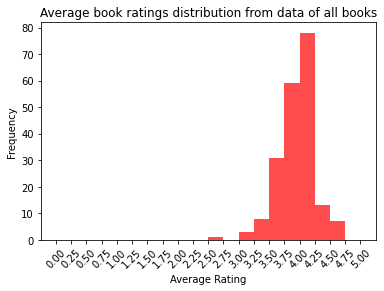

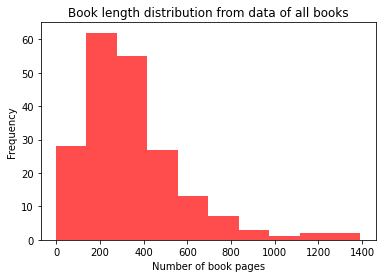

In [35]:
# #dataviz: create visualization for each group
# use this cell to create your histograms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("https://docs.google.com/spreadsheets/d/1if5bG_Nld7iQC3FcUBIv2SLT12HQSCqvawvN67iZ-yE/gviz/tq?tqx=out:csv")

dataAboveThreshold = df[df['num_pages'] >= 350]
dataUnderThreshold = df[df['num_pages'] < 350]

# # create histogram for each variable

# created reasonable bins for a better observation of the average rating histogram
bins = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5]

# average ratings with all books 
# df.average_rating
# using numpy's np.array() to create an array and plot it in a histogram
averageRatingsAllData = np.array(df.average_rating)
plt.hist(averageRatingsAllData, bins, facecolor='r', alpha=0.7, edgecolor='k', linewidth=0)
plt.title("Average book ratings distribution from data of all books")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
# displaying all bins 
plt.xticks(bins[::1]) 
# rotating ticks as they would overlap
plt.xticks(rotation = 45)
plt.show()

# num of pages of all books 
# df.num_pages
# using numpy's np.array() to create an array and plot it in a histogram
numPagesAllData = np.array(df.num_pages)
plt.hist(numPagesAllData, facecolor='r', alpha=0.7, edgecolor='k', linewidth=0)
plt.title("Book length distribution from data of all books")
plt.xlabel("Number of book pages")
plt.ylabel("Frequency")
plt.show()


# # the second graph
# # average ratings with books >= 350
# # dataAboveThreshold.average_rating, dataAboveThreshold.num_pages
# averageRatingsAboveThreshold = np.array(dataAboveThreshold.average_rating)
# plt.hist(averageRatingsAboveThreshold, bins, facecolor='r', alpha=0.7, edgecolor='k', linewidth=1)
# plt.title("Average book ratings distribution from data of books containing 500 or more pages")
# plt.xlabel("Average Rating")
# plt.ylabel("Frequency")
# plt.xticks(bins[::1]) 
# plt.xticks(rotation = 45)
# plt.show()

# # the third graph
# # average ratings with with book < 350 pages 
# # dataUnderThreshold.average_rating, dataUnderThreshold.num_pages
# averageRatingsUnderThreshold = np.array(dataUnderThreshold.average_rating)
# plt.hist(averageRatingsUnderThreshold, bins, facecolor='r', alpha=0.7, edgecolor='k', linewidth=1)
# plt.title("Average book ratings distribution from data of books containing less than 500 pages")
# plt.xlabel("Average Rating")
# plt.ylabel("Frequency")
# plt.xticks(bins[::1]) 
# plt.xticks(rotation = 45)
# plt.show()


# # both subgroups graphs in the same axes 
# # comparing them on relative frequencies, because comparing them on absolute frequencies wouldn't tell us anything meaningful, instead would probably yield misleading data
# plt.hist(averageRatingsAboveThreshold, bins, facecolor='r', alpha=1, edgecolor='k', linewidth=1, weights=np.ones_like(averageRatingsAboveThreshold) / len(averageRatingsAboveThreshold), label="Books >= 350 pages")
# plt.hist(averageRatingsUnderThreshold, bins, facecolor='b', alpha=.5, edgecolor='k', linewidth=1, weights=np.ones_like(averageRatingsUnderThreshold) / len(averageRatingsUnderThreshold), label="Books < 350 pages")
# plt.xlabel("Average Rating")
# plt.ylabel("Relative Frequency")
# plt.legend()
# plt.xticks(bins[::1]) 
# plt.xticks(rotation = 45)
# plt.show()


In [22]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1if5bG_Nld7iQC3FcUBIv2SLT12HQSCqvawvN67iZ-yE/gviz/tq?tqx=out:csv")
import numpy as np
from scipy import stats 

# fetch subgroups from the dataset
# one way to do it is like this:
dataAboveThreshold = df[df['num_pages'] >= 350] # for long books (350 pages or more)
dataUnderThreshold = df[df['num_pages'] < 350] # for short books (less than 350 pages)

# print summary statistics
def additionalStats(sample):
  print("- sample size (n1) =", len(sample))
  print("- mean =", np.mean(sample))
  print("- median =", np.median(sample))
  print("- mode =", stats.mode(sample)[0][0])
  print("- SD =", np.std(sample, ddof=1)) 
  # ^ By default, this function calculates the standard deviation using the population formula, which divides the sum of the 
  # squared differences by the total number of values in the sample. This is not correct for a sample, because it will 
  # underestimate the standard deviation and give a biased result.
  # to correct for this, we should set the ddof argument
  print("- range =", max(sample) - min(sample))


print("Average rating (Long books):")
additionalStats(dataAboveThreshold.average_rating)
print("\n")
print("Average rating (Short books):")
additionalStats(dataUnderThreshold.average_rating)

Average rating (Long books):
- sample size (n1) = 80
- mean = 4.027875
- median = 4.025
- mode = 4.0
- SD = 0.21813184812071112
- range = 1.0200000000000005


Average rating (Short books):
- sample size (n1) = 120
- mean = 3.8954166666666667
- median = 3.95
- mode = 3.95
- SD = 0.31924252742472553
- range = 2.0200000000000005


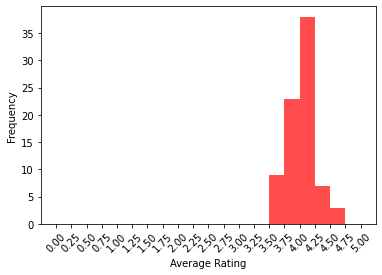

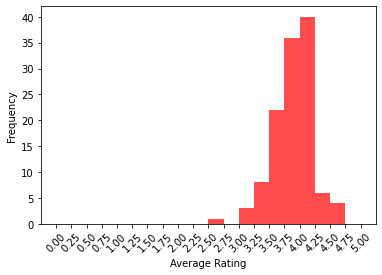

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("https://docs.google.com/spreadsheets/d/1if5bG_Nld7iQC3FcUBIv2SLT12HQSCqvawvN67iZ-yE/gviz/tq?tqx=out:csv")

dataAboveThreshold = df[df['num_pages'] >= 350]
dataUnderThreshold = df[df['num_pages'] < 350]

bins = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5]

# using numpy's np.array() to create an array and plot it in a histogram
# # average ratings for books >= 350
# # dataAboveThreshold.average_rating, dataAboveThreshold.num_pages
averageRatingsAboveThreshold = np.array(dataAboveThreshold.average_rating)
plt.hist(averageRatingsAboveThreshold, bins, facecolor='r', alpha=0.7, edgecolor='k', linewidth=0)
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.xticks(bins[::1]) 
plt.xticks(rotation = 45)
plt.show()

# # average ratings for with book < 350 pages 
# # dataUnderThreshold.average_rating, dataUnderThreshold.num_pages
averageRatingsUnderThreshold = np.array(dataUnderThreshold.average_rating)
plt.hist(averageRatingsUnderThreshold, bins, facecolor='r', alpha=0.7, edgecolor='k', linewidth=0)
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.xticks(bins[::1]) 
plt.xticks(rotation = 45)
plt.show()

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("https://docs.google.com/spreadsheets/d/1if5bG_Nld7iQC3FcUBIv2SLT12HQSCqvawvN67iZ-yE/gviz/tq?tqx=out:csv")

dataAboveThreshold = df[df['num_pages'] >= 350]
dataUnderThreshold = df[df['num_pages'] < 350]

# the function takes up two lists (samples) and performs a difference of means tests
def difference_of_means_test(data1,data2,tails):
    n1 = len(data1)
    n2 = len(data2)

    x1 = np.mean(data1)
    x2 = np.mean(data2)

    # like in the previous example, np.std() by default calculates the population standard deviation, that is why 
    # we should specify the degrees of freedom (ddof)
    s1 = np.std(data1,ddof=1) 
    s2 = np.std(data2,ddof=1)

    standard_error = np.sqrt(s1**2/n1 + s2**2/n2)
    t_score = np.abs((x2 - x1))/standard_error
    df = min(n1,n2) - 1 # conservative estimate from OpenIntro
    p_value = tails*stats.t.cdf(-t_score,df) # for a 1 or 2-tailed test

    sd_pooled = np.sqrt((s1**2*(n1-1) + s2**2*(n2-1))/(n1+n2-2))
    cohens_d = (x2 - x1)/sd_pooled

    # convert cohens'd to hegde's g
    hedges_g = cohens_d * (1 - (3 / (4 * (n1 + n2) - 9)))


    print('T =', t_score)
    print('p =', p_value)
    print('d =', cohens_d)
    print('g =', hedges_g)


difference_of_means_test(dataUnderThreshold.average_rating, dataAboveThreshold.average_rating,  1)

T = 3.4856646885001656
p = 0.0004021979905079741
d = 0.46761889951094787
g = 0.46584537650395313


In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

df = pd.read_csv("https://docs.google.com/spreadsheets/d/1if5bG_Nld7iQC3FcUBIv2SLT12HQSCqvawvN67iZ-yE/gviz/tq?tqx=out:csv")

dataAboveThreshold = df[df['num_pages'] >= 350]
dataUnderThreshold = df[df['num_pages'] < 350]

def confidence_interval(data, confidence_level):  
    # Calculate the mean and sample size of the data
    mean = np.mean(data)
    sample_size = len(data)

    # Calculate the standard error
    standard_error = mean / np.sqrt(sample_size)

    # Calculate the degrees of freedom
    df = sample_size - 1

    # Calculate the critical value
    critical_value = stats.t.ppf(1 - (1 - confidence_level) / 2, df)

    # Calculate the lower and upper bounds of the confidence interval
    lower_bound = mean - critical_value * standard_error
    upper_bound = mean + critical_value * standard_error

    # Return the confidence interval as a tuple
    return (lower_bound, upper_bound)

print("95% confidence interval for long books:", confidence_interval(dataAboveThreshold.average_rating, .95))
print("95% confidence interval for short books:", confidence_interval(dataUnderThreshold.average_rating, .95))

95% confidence interval for long books: (3.131515327548847, 4.924234672451153)
95% confidence interval for short books: (3.1912906493424926, 4.59954268399084)
